# Neural Net testing

In [1]:
import numpy as np                                                              
import matplotlib.pyplot as plt

import neuralNet as nn
import utils as u

## One variable function testing

In [2]:
testFunc = lambda x: np.sum(np.atleast_2d(x), axis=1) % 2

n_max = 1024
nDigs = len(bin(n_max)[2:])
inputs = np.array([[int(i) for i in list(bin(x)[2:].zfill(nDigs))] for x in range(n_max)])
outputs = testFunc(inputs)

sizes = [nDigs, 100, 1]

model = nn.NeuralNet(sizes, **nn.losses['log'], **nn.activations['sigmoid'])

it, E_ins = model.learn(inputs, outputs, maxIters=100, trackE_in=True)

/Users/akshayyeluri/anaconda3/envs/neural/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


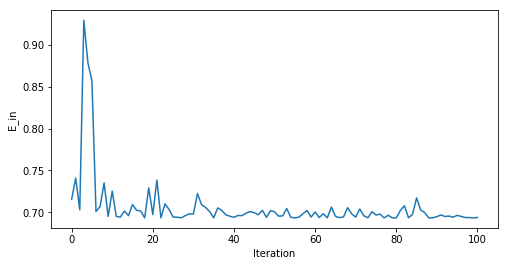

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

u.plotE_ins(E_ins, axis=ax)
#model.quickPlot(inputs, outputs, axis=ax[1])

fig.show()

outputs2 = np.round(np.array([model.calculate(i) for i in inputs]))

In [4]:
testFunc = lambda x: np.sin(2 * x)

inputs = np.linspace(-np.pi, np.pi, 200)
outputs = testFunc(inputs)

sizes = [1, 100, 100, 1]

## For cosine, need different nonlinearity
#model = nn.NeuralNet(sizes, **nn.activations['sigmoid'])
model = nn.NeuralNet(sizes, **nn.activations['tanh'])

it, E_ins = model.learn(inputs, outputs, maxIters=1000, trackE_in=True)

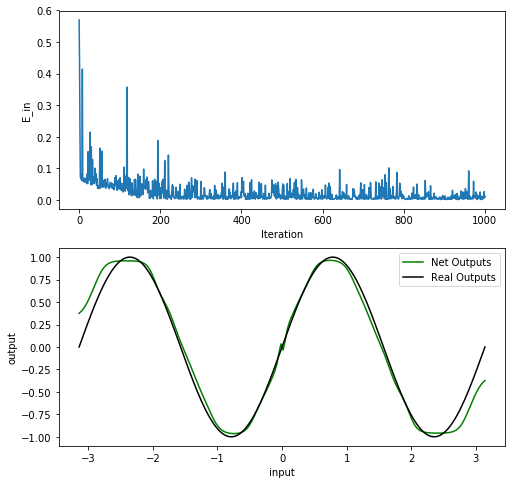

In [5]:
fig, ax = plt.subplots(2, 1, figsize=(8, 8))

u.plotE_ins(E_ins, axis=ax[0])
model.quickPlot(inputs, outputs, axis=ax[1])

fig.show()

In [6]:
inputs = np.random.uniform(-np.pi, np.pi, 20)
outputs = testFunc(inputs)

outputs2 = np.array([model.calculate(i) for i in inputs])
outputs2 - outputs

array([-0.01902904, -0.02364591,  0.04149552,  0.09570431, -0.03209453,
        0.03987883, -0.03839062,  0.02156217, -0.02727589, -0.01161346,
        0.03281218, -0.03830027,  0.0132465 ,  0.02255916, -0.097111  ,
        0.16705806, -0.03344074, -0.03846606,  0.0376631 , -0.09633635])

## Multi-Variable Function Testing

In [7]:
testFunc = lambda x, y: np.cos(x + y)

inputs = np.linspace(-np.pi / 2, np.pi / 2, 100)
inputs = np.vstack((inputs / 3, inputs * 2 / 3)).T
outputs = testFunc(inputs[:, 0], inputs[:, 1])

sizes = [2, 100, 100, 1]

model = nn.NeuralNet(sizes, **nn.activations['sigmoid'])
#model = nn.NeuralNet(sizes)

it, E_ins = model.learn(inputs, outputs, maxIters=1000, trackE_in=True)

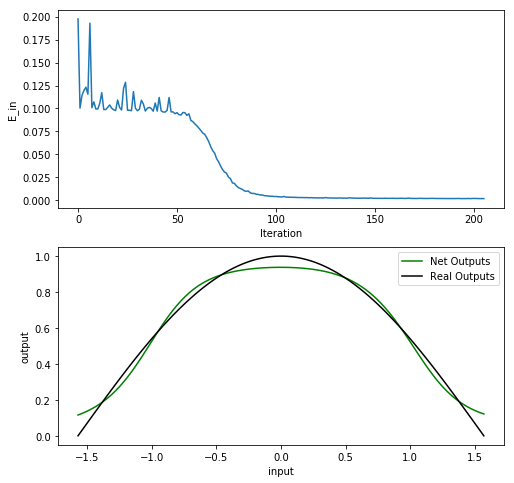

In [8]:
fig, ax = plt.subplots(2, 1, figsize=(8, 8))

u.plotE_ins(E_ins, axis=ax[0])

ax[1].plot(np.sum(inputs, axis=1), [model.calculate(i) for i in inputs], color='g', label='Net Outputs')
ax[1].plot(np.sum(inputs, axis=1), outputs, color='k', label='Real Outputs')
ax[1].set_xlabel('input')
ax[1].set_ylabel('output')
ax[1].legend()

fig.show()

In [9]:
inputs = np.random.uniform(-np.pi, np.pi, 20)
inputs = np.vstack((inputs / 3, inputs * 2 / 3)).T
outputs = testFunc(inputs[:, 0], inputs[:, 1])

outputs2 = np.array([model.calculate(i) for i in inputs])
outputs2 - outputs

array([-0.01191292,  0.39542627,  0.67148611,  0.30888004,  1.0134231 ,
        0.03495909, -0.03283041,  0.29599537,  0.5962269 , -0.05104474,
       -0.03823496, -0.01453771, -0.03374084,  0.63461936,  0.19145938,
        0.18002296,  0.04937591, -0.00353698, -0.03508086,  0.22878559])

## MNIST